# First Project 27 September 2022 Nealson Setiawan

## Question: What Factors affects box office? Can we use it to predict future box offices?

##### Pre-processing

In [694]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

##### Reading CSV File

In [695]:
IMDBdf = pd.read_csv('/Users/nealsonsetiawan/Documents/Education_Files/Jupyter/Datasets/IMDB_movie_reviews_details.csv')

IMDBdf.head()
#Purely Raw
#Gross is the dependent variable

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [696]:
IMDBdf.shape

(1000, 10)

In [697]:
IMDBdf.dtypes

Unnamed: 0      int64
name           object
year           object
runtime         int64
genre          object
rating        float64
metascore     float64
timeline       object
votes          object
gross          object
dtype: object

In [698]:
IMDBdf.isnull().sum()

Unnamed: 0      0
name            0
year            0
runtime         0
genre           0
rating          0
metascore     159
timeline        0
votes           0
gross         171
dtype: int64

#### Cleaning raw data

Checklist:
<br>
1. Are values prone to error? 
<br>
2. Do we have the same unit for the data? 
<br>
3. Is there consistency in the meaning of data?
<br>
4. Are there missing values in your data and what is the reason and what you can do about it?
<br>
5. Is the same value recorded in the same way everywhere?
<br>
6. Are there any duplicates?
<br>
7. Is your data unbiased?
<br>
8. Removed all sources of noise from your data?
<br>
9. Identified and remove sources of data leakage?
<br>
10. Are there any obvious outliers?
<br>

I got from https://www.kaggle.com/getting-started/187884.


### Votes

##### Removing all commas from votes column and casting to integers

In [699]:
IMDBdf.columns.get_loc('votes') #Finding index of 'votes'

8

In [700]:
for i in range(0,len(IMDBdf['votes'])):
    IMDBdf.iloc[i,8] = IMDBdf.iloc[i,8].replace(',','') #Removing all commas from votes and casting to integers
    #print('success'+str(i))

IMDBdf['votes'] = IMDBdf['votes'].fillna(0).astype(int)

### Gross

##### Turning Gross into countable integers

In [701]:
IMDBdf.columns.get_loc('gross') #Finding index of 'gross'

9

In [702]:
for i in range(0,len(IMDBdf['gross'])):
        if isinstance(IMDBdf.iloc[i,9],str):
            IMDBdf.iloc[i,9] = IMDBdf.iloc[i,9].replace('$','') #Removing all $
            IMDBdf.iloc[i,9] = IMDBdf.iloc[i,9].replace('M','') #Removing all M
        #print('success'+str(i))





IMDBdf['gross'] = IMDBdf['gross'].fillna(0).astype(float) #Casting to float

### Timeline

##### Dropping Timeline because I am not versed with NLP yet!

In [703]:
IMDBdf = IMDBdf.drop('timeline', axis=1)

### Metascore

##### Casting to Int

In [704]:
IMDBdf['metascore'] = IMDBdf['metascore'].fillna(0).astype(float)

### Rating

In [705]:
IMDBdf['rating'] = IMDBdf['rating'].fillna(0).astype(float)

### Genre

### Runtime

In [706]:
IMDBdf['runtime'] = IMDBdf['runtime'].fillna(0).astype(int)

### Year

##### Extract only numbers from year and turn to Numeric

In [707]:
numPattern = '(\d+)'
IMDBdf['yearNumber'] = IMDBdf['year'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

#From https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/

### Removing Dupes

In [708]:
IMDBdf['dupe'] = IMDBdf.duplicated()

In [709]:
IMDBdf.loc[IMDBdf['dupe'] == True] #None!

,Unnamed: 0,name,year,runtime,genre,rating,metascore,votes,gross,yearNumber,dupe


#### Plotting Null

In [710]:
dfNull = IMDBdf.where(IMDBdf.isnull())




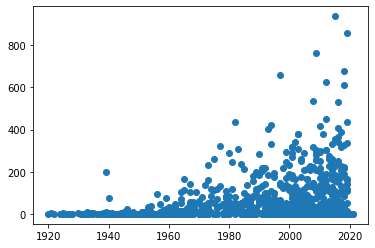

In [711]:
plt.scatter(x=IMDBdf['yearNumber'], y=IMDBdf['gross'])